# Objective

Develop a **model** for **predicting fraudulent transactions** for a financial company and use insights from the model to develop an actionable plan. Data for the case is available in CSV format having **6362620 rows and 11 columns.**

# Data Dictionary

**step** - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

**type** - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

**amount** - amount of the transaction in local currency.

**nameOrig** - customer who started the transaction

**oldbalanceOrg** - initial balance before the transaction

**newbalanceOrig** - new balance after the transaction

**nameDest** - customer who is the recipient of the transaction

**oldbalanceDest** - initial balance recipient before the transaction. Note that there is no information for customers that start with M (Merchants).

**newbalanceDest** - new balance recipient after the transaction. Note that there is no information for customers that start with M (Merchants).

**isFraud** - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

**isFlaggedFraud** - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

# Import Necessary Libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Import Data as DataFrame

In [30]:
df= pd.read_csv("/kaggle/input/scam-detection/Fraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Exploratory Data Analysis

In [31]:
df.shape

(6362620, 11)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


# Check Missing Values

In [33]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

**There are no missing values in any of the columns.**


# Check number of unique values in all columns

In [34]:
df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

**It appears that only "nameOrig" contains unique values, while all other columns have repetitive values.**

In [35]:
Name_origin= df['nameOrig'].value_counts()[df['nameOrig'].value_counts()>1]
Name_origin

nameOrig
C1530544995    3
C545315117     3
C724452879     3
C1784010646    3
C1677795071    3
              ..
C2144851856    2
C1246741619    2
C1029954491    2
C1344930553    2
C1054700999    2
Name: count, Length: 9298, dtype: int64

**While most of the "nameOrig" values are unique, the maximum repetition is only 3. This indicates that the column primarily contains unique values with minimal repetition, so it can be dropped.**  

# Drop irrelavant columns

In [36]:
df = df.drop(['nameOrig','step'], axis=1)
df

,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,PAYMENT,1864.28,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,TRANSFER,181.00,181.00,0.00,C553264065,0.00,0.00,1,0
3,CASH_OUT,181.00,181.00,0.00,C38997010,21182.00,0.00,1,0
4,PAYMENT,11668.14,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,TRANSFER,6311409.28,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,CASH_OUT,6311409.28,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,TRANSFER,850002.52,850002.52,0.00,C2080388513,0.00,0.00,1,0


**The "step" and "nameOrig" columns have been dropped. Since "step" represents a time unit with no relevance to fraud detection, it has been removed.**
 

**The business model focuses on controlling large transfers between accounts and flags illegal attempts. In this dataset, an illegal attempt is defined as a transfer exceeding 2,00,000 in a single transaction. Therefore, "isFlaggedFraud" is set to 1 for transactions where "amount" > 200000.**


In [37]:
df['isFlaggedFraud'] = (df['amount'] > 200000).astype(int)
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    4689050
1    1673570
Name: count, dtype: int64

**This means that 16,73,570 transactions involve an amount greater than 2,00,000.**

# Check duplicate data

In [38]:
df.duplicated().sum()

0

**No duplicate data is present in the dataset.**

# Correlation Matrix of Dataset

<Axes: >

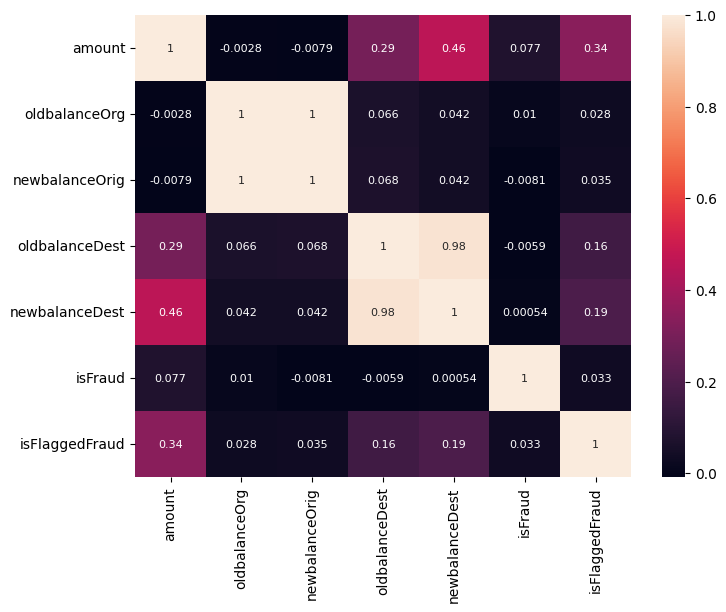

In [40]:
corr_cols = df.select_dtypes(include='number').columns
corr_matrix = df[corr_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, annot_kws={"size": 8})

# Statistical Summary of Dataset

In [39]:
df.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.630316e-01
std,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,4.402795e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,1.000000e+00
max,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


# Outlier Treatment

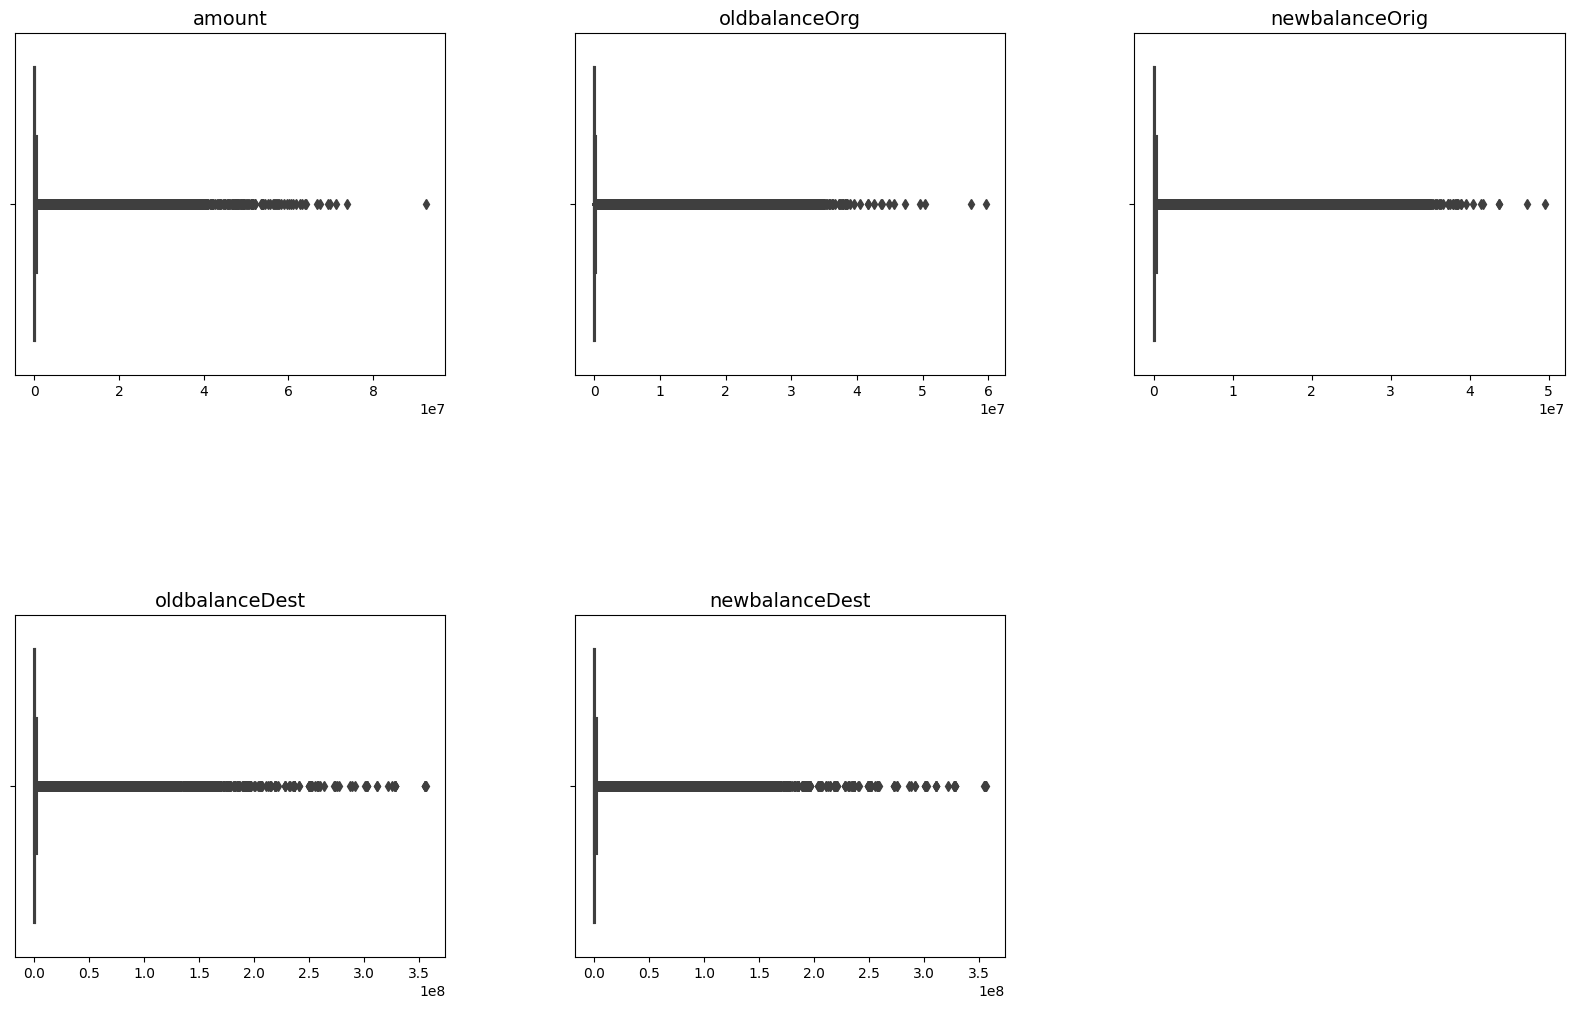

In [41]:
cols = ['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']
fig, ax = plt.subplots(2, 3, figsize = (20,12)) #Create subplots with 2 rows and 3 columns, each subplot measuring 20 by 12 inches.
k = 0
for i in range(2): #for 2 rows # Divided 5 variables into 2*3 matrix.
    for j in range(3): #for 3 columns
        if len(cols) == k: #for 6th empty box
            ax[i,j].axis("off") 
            break
        sns.boxplot(x = cols[k], data = df, ax = ax[i,j])
        ax[i,j].set_title(cols[k], size = 14) #Select Column name as a title.
        ax[i,j].set_xlabel('') # To make X-label empty
        k += 1

plt.subplots_adjust(wspace = 0.3, hspace = 0.7) #Adjuested Height & width padding between subplots

**The plots indicate that outliers are present in all five columns: 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', and 'newbalanceDest'.**

**Define Outlier Function**

In [42]:
def outliers(x):
    q1,q3=x.quantile([0.25,0.75])
    iqr=q3-q1
    min_value=q1-1.5*iqr
    max_value=q3+1.5*iqr
    return min_value,max_value

**Clipping Outlier Values** 

In [43]:
for i in cols:
    min_value, max_value = outliers(df[i])
    df[i] = np.where(df[i] < min_value, min_value, 
            np.where(df[i] > max_value, max_value, df[i]))
df.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,1.322667e+05,7.221247e+04,8.872275e+04,6.003940e+05,7.150404e+05,1.290820e-03,2.630316e-01
std,1.462368e+05,1.024141e+05,1.393412e+05,8.369711e+05,9.673665e+05,3.590480e-02,4.402795e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,1.000000e+00
max,5.017193e+05,2.682879e+05,3.606460e+05,2.357592e+06,2.779773e+06,1.000000e+00,1.000000e+00


# Perform Null Hypothesis

**1. None of the Merchant accounts are involved in fraud.**

In [44]:
merchant_transactions = df[df['nameDest'].str.startswith('M')]

# Check if any of these transactions are fraudulent
fraudulent_merchant_transactions = merchant_transactions[merchant_transactions['isFraud'] == 1]

# If there are no fraudulent transactions involving Merchants, the null hypothesis holds
if fraudulent_merchant_transactions.empty:
    print("Null hypothesis accepted: None of the Merchant accounts are involved in fraud.")
else:
    print("Null hypothesis rejected: Some Merchant accounts are involved in fraud.")
    print("Fraudulent Merchant transactions:")
    print(fraudulent_merchant_transactions.head())

Null hypothesis accepted: None of the Merchant accounts are involved in fraud.


**2. All Merchant transactions are of type PAYMENT.**

In [45]:
# Check if all Merchant transactions are of type 'PAYMENT'
non_payment_merchant_transactions = merchant_transactions[merchant_transactions['type'] != 'PAYMENT']

# If there are no non-PAYMENT transactions involving Merchants, the null hypothesis holds
if non_payment_merchant_transactions.empty:
    print("Null hypothesis accepted: All Merchant transactions are of type PAYMENT.")
else:
    print("Null hypothesis rejected: Not all Merchant transactions are of type PAYMENT.")
    print("Non-PAYMENT Merchant transactions:")
    print(non_payment_merchant_transactions.head())

Null hypothesis accepted: All Merchant transactions are of type PAYMENT.


**Conclusion:**

**Overall, these findings help narrow down the scope of fraud detection efforts by confirming that Merchant accounts are not involved in fraud and that their transactions are uniformly of the PAYMENT type. This allows for a more focused approach in identifying fraudulent activities within customer accounts and transaction types other than PAYMENT.**

# Encoding Categorical Columns for Numerical Analysis

**The "nameDest" column contains two types of accounts: merchants and customers. We will first extract the type of account based on the initial letter (M for merchant and C for customer), and then convert 'M' to 1 and 'C' to 0.**

In [46]:
df['nameDest'] = df['nameDest'].str[0]
df['nameDest'] = df['nameDest'].map({'M': 1, 'C': 0})
print(df['nameDest'].value_counts())

nameDest
0    4211125
1    2151495
Name: count, dtype: int64


**There are 42,11,125 customer accounts and 21,51,495 merchant accounts.**

**Convert the "Type" column using label encoding:**

**0 for CASH-IN**

**1 for CASH-OUT**

**2 for DEBIT**

**3 for PAYMENT**

**4 for TRANSFER**

In [47]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

In [48]:
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,3,9839.64,170136.0,160296.36,1,0.0,0.0,0,0
1,3,1864.28,21249.0,19384.72,1,0.0,0.0,0,0
2,4,181.00,181.0,0.00,0,0.0,0.0,1,0
3,1,181.00,181.0,0.00,0,21182.0,0.0,1,0
4,3,11668.14,41554.0,29885.86,1,0.0,0.0,0,0


**All columns have been converted to numeric values.**

# Correlation Matrix of Dataset

<Axes: >

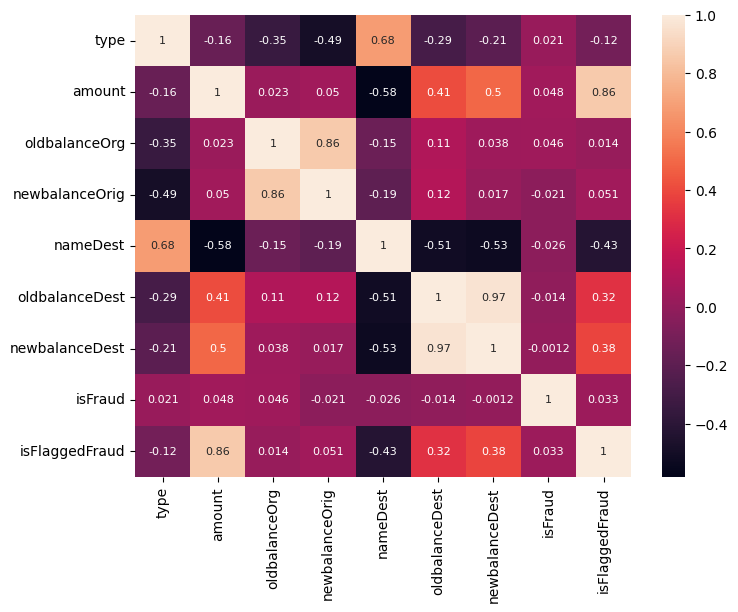

In [49]:
corr_cols = df.select_dtypes(include='number').columns
corr_matrix = df[corr_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, annot_kws={"size": 8})

**The correlation matrix reveals the following significant relationships:**

**- High correlation between "oldbalanceOrg" and "newbalanceOrig"**

**- High correlation between "oldbalanceDest" and "newbalanceDest"**

**- Strong correlation between "amount" and "isFlaggedFraud"**

**Additionally, there are notable correlations between "amount" and "newbalanceDest", as well as between "amount" and "oldbalanceDest".**

# Split the data into training and testing sets

In [50]:
from sklearn.model_selection import train_test_split

#Prepare X and y from the Dataframe
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# Perform the test-train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=86)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (5090096, 8) (5090096,)
Testing set shape: (1272524, 8) (1272524,)


# Feature Scaling

**Standardize the dataset to ensure all features have a mean of 0 and a standard deviation of 1.**

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# XGBoost Model

**Why am I using the XGBoost model for this data?**
 
XGBoost is a highly efficient and powerful machine learning algorithm based on decision trees. It utilizes gradient boosting, where new models are trained to correct the errors of previous models. This makes XGBoost particularly well-suited for handling imbalanced datasets, which is ideal for fraud detection.
 
XGBoost is known for its ability to handle complex patterns in data, apply regularization to prevent overfitting, and deliver high performance on classification tasks.


In [53]:
pip install xgboost

**Why I am using Bayesian optimization (hyperopt) for parameter tuning?**

Bayesian optimization, implemented via Hyperopt, is a powerful technique for hyperparameter tuning that efficiently explores the parameter space to find optimal values. Unlike random or grid search methods, Bayesian optimization builds a probabilistic model of the objective function and uses it to guide the search for optimal hyperparameters.
 
This approach is particularly effective for complex models with many hyperparameters, as it balances exploration and exploitation, leading to more efficient and faster convergence to optimal hyperparameters. It improves model performance and robustness by systematically finding the best parameter configurations.

In [55]:
pip install hyperopt

In [57]:
import xgboost as xgb
from hyperopt import hp, fmin, tpe, Trials
from sklearn.metrics import f1_score, make_scorer, recall_score, recall_score, precision_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_validate, cross_val_score


# Define the search space for hyperparameters
space = {
    'max_depth': hp.quniform("max_depth", 3, 10, 1),
    'n_estimators': hp.quniform('n_estimators', 50, 200, 10),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
    'scale_pos_weight': hp.uniform('scale_pos_weight', 0.1, 10),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
    'reg_alpha': hp.loguniform('reg_alpha', -2, 1),
    'reg_lambda': hp.loguniform('reg_lambda', -2, 1),
    'gamma': hp.loguniform('gamma', -2, 1),
    'learning_rate': hp.loguniform('learning_rate', -3, 0)
}

# Define the objective function to minimize
def objective(params):
    xgb_model = xgb.XGBClassifier(
        n_estimators=int(params['n_estimators']),  # Cast to int
        max_depth=int(params['max_depth']),        # Cast to int
        subsample=params['subsample'],
        min_child_weight=int(params['min_child_weight']),  # Cast to int
        scale_pos_weight=params['scale_pos_weight'],
        colsample_bytree=params['colsample_bytree'],
        reg_alpha=params['reg_alpha'],
        reg_lambda=params['reg_lambda'],
        gamma=params['gamma'],
        learning_rate=params['learning_rate'],
        use_label_encoder=False,
        eval_metric='logloss',  # XGBoost >= 1.3 requires an explicit eval metric for classification
        verbose=2, n_jobs=-1,
        tree_method='gpu_hist',  # Use GPU for histogram-based algorithms
        gpu_id=0  # Specify which GPU to use
    )

     # Use StratifiedKFold cross-validation (important for imbalanced data)
    Kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # Use cross-validation to avoid overfitting
    f1_scorer = make_scorer(f1_score)  # Create a scorer for f1 score
    cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=Kfold, scoring=f1_scorer)
    
    # Return the negative mean of the cross-validated F1 scores (Hyperopt minimizes the objective)
    return -np.mean(cv_scores)

# Perform Bayesian optimization
trials = Trials()
best = fmin(objective, space, algo=tpe.suggest, trials=trials, max_evals=200)

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best)

100%|██████████| 200/200 [1:58:26<00:00, 35.53s/trial, best loss: -0.7973138829108862]
Best Hyperparameters:
{'colsample_bytree': 0.9546375493435679, 'gamma': 0.9980848650795233, 'learning_rate': 0.21110695747482383, 'max_depth': 10.0, 'min_child_weight': 4.0, 'n_estimators': 160.0, 'reg_alpha': 0.4227225535899689, 'reg_lambda': 0.18343695947171687, 'scale_pos_weight': 1.774934204357267, 'subsample': 0.7861773170571186}


# Train the XGBoost model with the best hyperparameters

In [58]:
best['max_depth'] = int(best['max_depth'])
best['n_estimators'] = int(best['n_estimators'])
best['min_child_weight'] = int(best['min_child_weight'])

best_model = xgb.XGBClassifier(**best, objective='binary:logistic', eval_metric='logloss', tree_method='gpu_hist', gpu_id=0, use_label_encoder=False, verbose=2, n_jobs=-1)
best_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9546375493435679, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None,
              gamma=0.9980848650795233, gpu_id=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.21110695747482383, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=160, n_jobs=-1,
              num_parallel_tree=None, ...)

# Find Highly correlated variables 

In [59]:
X_train_df = pd.DataFrame(X_train, columns=X.columns)

# Calculate the correlation matrix
corr_matrix = X_train_df.corr()

# Identify highly correlated variables
highly_correlated_vars = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.8:  # Threshold for high correlation (e.g., > 0.8)
            highly_correlated_vars.append((corr_matrix.columns[i], corr_matrix.columns[j]))

print("Highly correlated variables:", highly_correlated_vars)

Highly correlated variables: [('amount', 'isFlaggedFraud'), ('oldbalanceOrg', 'newbalanceOrig'), ('oldbalanceDest', 'newbalanceDest')]


# Perform feature selection using Recursive Feature Elimination (RFE)

**RFE iteratively removes the least important features and builds the model until the specified number of features is reached.**

**This helps in selecting the most relevant features for improving model performance.**


In [60]:
from sklearn.feature_selection import RFE

# Initialize the RFE object
rfe = RFE(best_model, n_features_to_select=5)

# Fit the RFE object to the data
rfe.fit(X_train_df, y_train)

# Get the selected features
selected_features = X_train_df.columns[rfe.support_]
print("Selected features:", selected_features)

Selected features: Index(['type', 'newbalanceOrig', 'nameDest', 'newbalanceDest',
       'isFlaggedFraud'],
      dtype='object')


# Perform cross-validations

In [61]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=12)

scores = []
for i, (train_index, val_index) in enumerate(kf.split(X_train_df.values, y_train)):
  X_train_fold = X_train_df.iloc[train_index] 
  y_train_fold = y_train.iloc[train_index]

  X_val_fold = X_train_df.iloc[val_index]
  y_val_fold = y_train.iloc[val_index]

  print(f"Fold {i+1} of {kf.n_splits}:")

  # Train the XGBoost model on the current fold
  best_model.fit(X_train_fold, y_train_fold)
  print("Model trained on current fold.")

  # Evaluate the model on the current fold
  y_pred_fold = best_model.predict(X_val_fold)
  f1_fold = f1_score(y_val_fold, y_pred_fold)
  scores.append(f1_fold)
  print(f"F1 score on current fold: {f1_fold:.4f}\n")

print("Cross-validation scores:", scores)

Fold 1 of 5:
Model trained on current fold.
F1 score on current fold: 0.7823

Fold 2 of 5:
Model trained on current fold.
F1 score on current fold: 0.7795

Fold 3 of 5:
Model trained on current fold.
F1 score on current fold: 0.7831

Fold 4 of 5:
Model trained on current fold.
F1 score on current fold: 0.8061

Fold 5 of 5:
Model trained on current fold.
F1 score on current fold: 0.7962

Cross-validation scores: [0.7823318742538798, 0.7794707297514034, 0.7830985915492958, 0.8060654429369514, 0.796193497224425]


**Conclusion:**
 
- The cross-validation scores for the model are: [0.7823, 0.7795, 0.7831, 0.8061, 0.7962]. 
- These scores indicate generally high performance and consistency across different folds.
- The variation in scores suggests that the model performs well overall, with some fluctuation in performance.
- The highest score (0.8061) shows the potential for strong predictive accuracy, while the lowest score (0.7795) indicates room for improvement.

# Model Evaluation

In [62]:
y_pred_test = best_model.predict(X_test)
y_pred_proba_test = best_model.predict_proba(X_test)[:, 1]

# Calculate the F1 score, recall, and precision on the test data
val_f1_score = f1_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
print("Validation F1 Score:", val_f1_score)
print("Test recall:", recall_test)
print("Test precision:", precision_test)

# Get the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_test))

# Get the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))

Validation F1 Score: 0.7968553459119496
Test recall: 0.75551580202743
Test precision: 0.8429807052561543
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270847
           1       0.84      0.76      0.80      1677

    accuracy                           1.00   1272524
   macro avg       0.92      0.88      0.90   1272524
weighted avg       1.00      1.00      1.00   1272524

Confusion Matrix:
[[1270611     236]
 [    410    1267]]


# Conclusion

The model's performance on the test data is as follows:
- Validation F1 Score: 0.797
- Test Recall: 0.756
- Test Precision: 0.843

The classification report indicates:
- Precision for class 0 (non-fraud): 1.00
- Recall for class 0 (non-fraud): 1.00
- F1-score for class 0 (non-fraud): 1.00
- Precision for class 1 (fraud): 0.84
- Recall for class 1 (fraud): 0.76
- F1-score for class 1 (fraud): 0.80

The confusion matrix shows:
- True Negatives: 1,270,611
- False Positives: 236
- False Negatives: 410
- True Positives: 1,267

**Overall, the model demonstrates strong performance with high accuracy (1.00) and excellent precision for non-fraud cases. While the recall and F1-score for fraud detection are slightly lower, the model effectively identifies the majority of fraud cases. There is a trade-off between precision and recall, which is common in imbalanced datasets. The results suggest that the model is robust and reliable for fraud detection, with good performance in identifying both fraudulent and non-fraudulent transactions.**
